In [1]:
%matplotlib notebook
import tifffile as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def sum_intensity(path_to_file):
    v0 = tf.imread(path_to_file)
    v0_normalized = (v0 - v0.min())/(v0.max() - v0.min())
    v0_total = np.sum(v0_normalized)
    v0_total_normalized = v0_total / float(v0.size)
    return v0_total_normalized
def num_cells(path_to_csv):
    csv = pd.read_csv(path_to_csv)
    return csv.x.count()
num_files = 10

In [3]:
intensities = []
for i in range(num_files):
    intensities.append(sum_intensity('../../sample_data/cell_detection_{}.tiff'.format(i)))
    print("total intensity in {} : {}".format('cell_detection_{}'.format(i), intensities[i]))

total intensity in cell_detection_0 : 0.0211110895197226
total intensity in cell_detection_1 : 0.020767556432421917
total intensity in cell_detection_2 : 0.0162195813911522
total intensity in cell_detection_3 : 0.01805755874978913
total intensity in cell_detection_4 : 0.026030725131714966
total intensity in cell_detection_5 : 0.03670582011191696
total intensity in cell_detection_6 : 0.03902403613450089
total intensity in cell_detection_7 : 0.032343556034288644
total intensity in cell_detection_8 : 0.06291848947252542
total intensity in cell_detection_9 : 0.05161095621927351


In [4]:
cells = []
for i in range(num_files):
    cells.append(num_cells('../../annotation_csv/cell_detection_{}.csv'.format(i)))
    print("total cells in {}: {}".format('cell_detection_{}'.format(i), cells[i]))

total cells in cell_detection_0: 68
total cells in cell_detection_1: 68
total cells in cell_detection_2: 41
total cells in cell_detection_3: 56
total cells in cell_detection_4: 19
total cells in cell_detection_5: 66
total cells in cell_detection_6: 204
total cells in cell_detection_7: 45
total cells in cell_detection_8: 204
total cells in cell_detection_9: 86


<IPython.core.display.Javascript object>


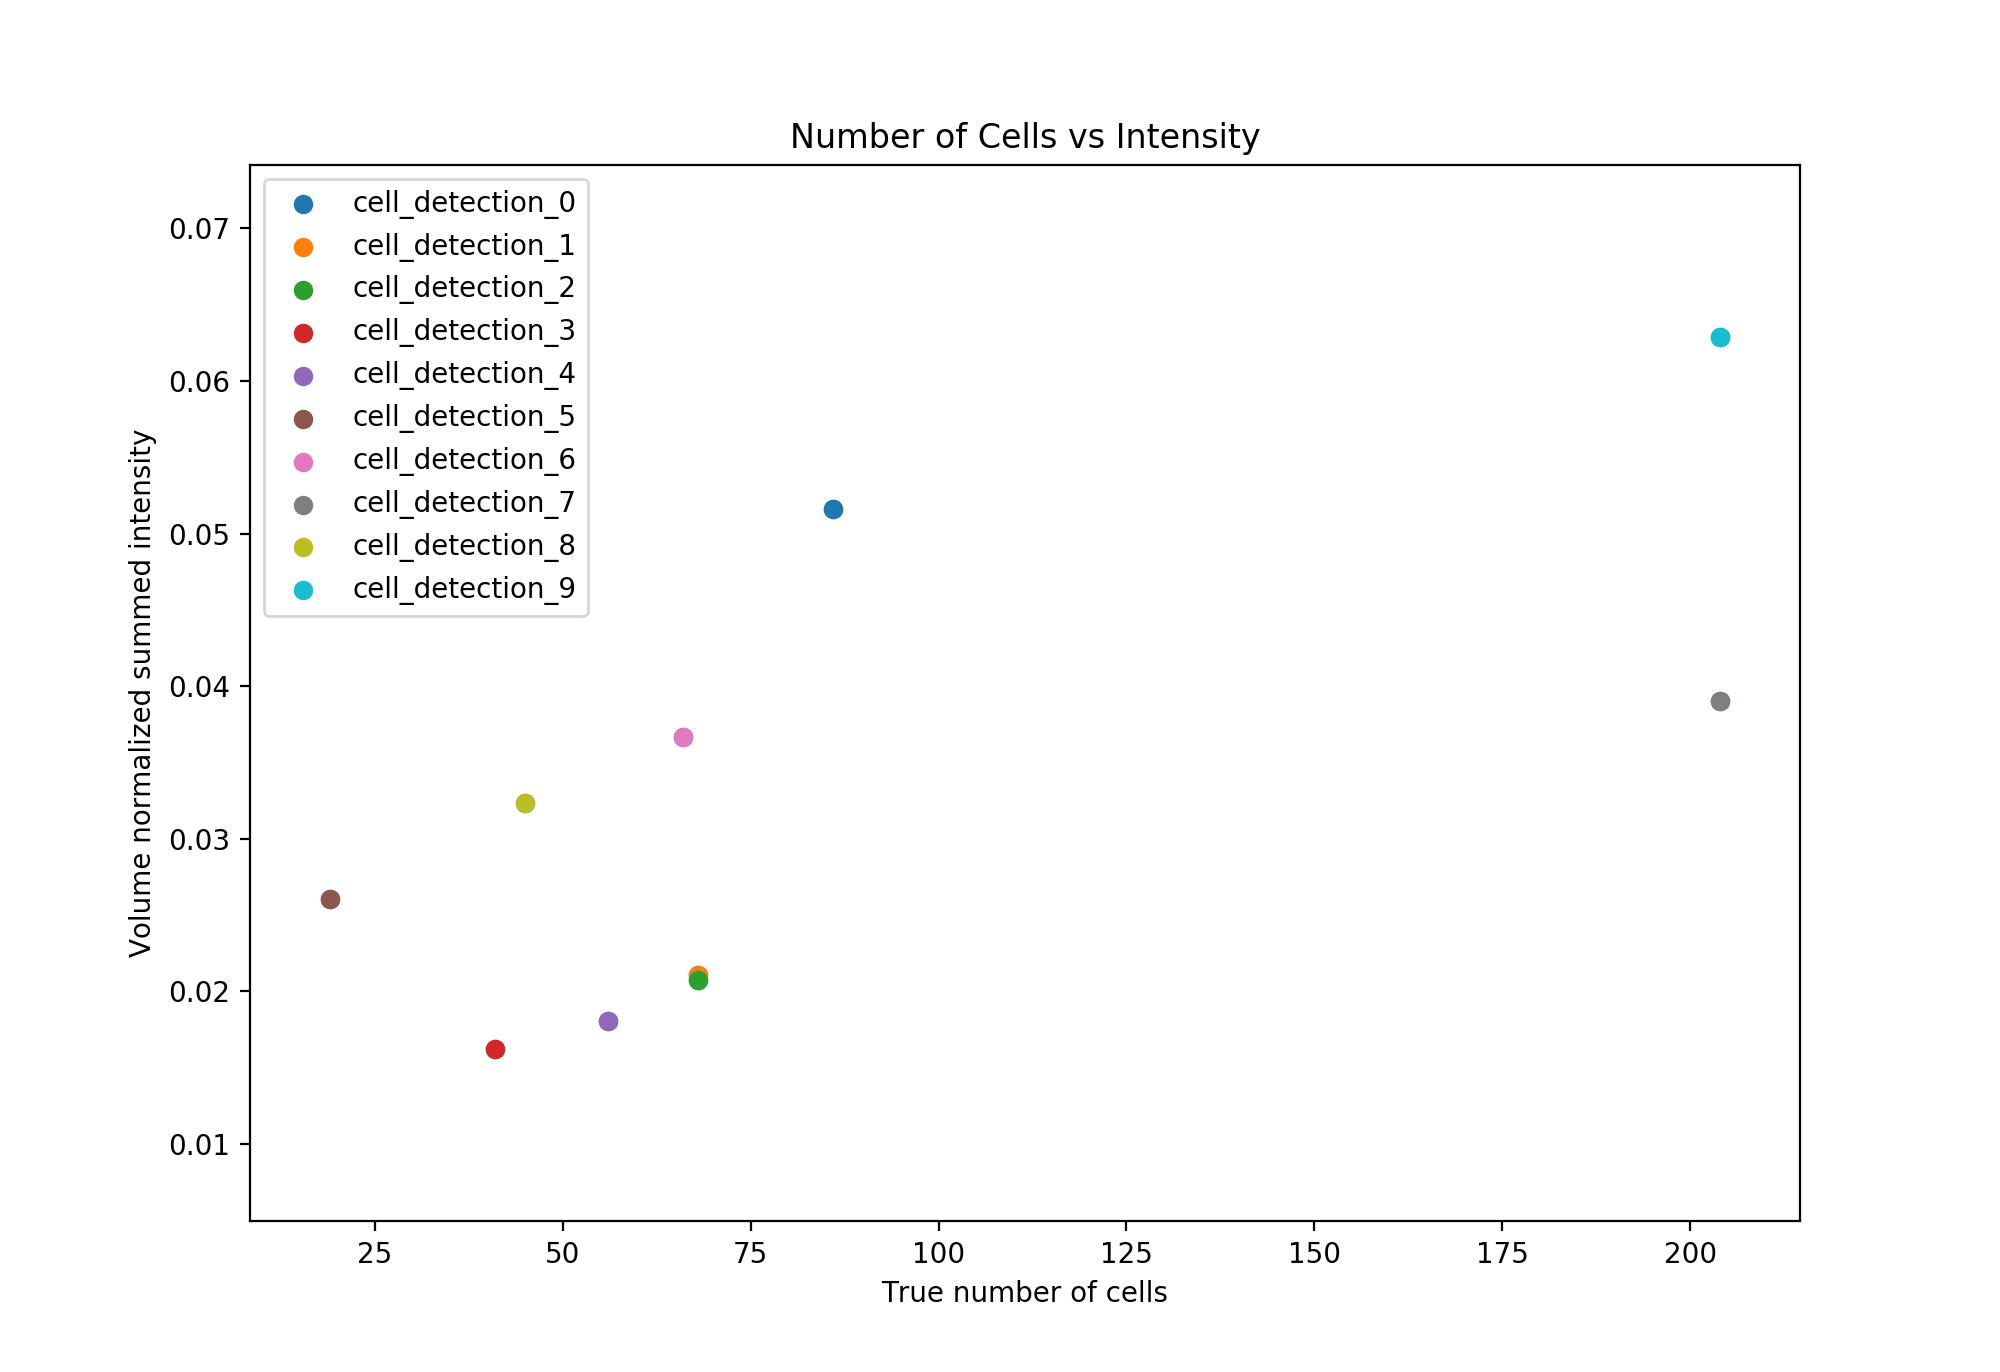

In [5]:
plt.scatter(np.array(cells).T, np.array(intensities))
for i in range(num_files):
    plt.scatter(cells[i], intensities[i])
plt.xlabel('True number of cells')
plt.ylabel('Volume normalized summed intensity')
plt.title('Number of Cells vs Intensity')
plt.legend(['cell_detection_{}'.format(i) for i in range(num_files)], )

